# <font color='orange'> Numerical Exercises 10 </font>
In this exercise we want to continue the study of the **TSP** by using two other different approaches, and considering the same conditions of the problem studied in <font color='orange'>Numerical Exercise 9</font>, so that we can compare the results obtained.

## <font color='blue'>Exercise 10.1</font>

In this first exercise I adapt the *Genetic Algorithm (GA)* code written in the previous exercise so that I can solve the problem of optimizing the path between the $ 32 $ cities in $ 2 - $dimension through a **Simulated Annealing (SA)** algorithm. <br>
To do this I add to the code a new class, <font color='green'>Class Annealer</font>, which is described by

- a <font color='green'>Chromosome</font> representing the path to be optimized;
- the so called **Annealing Schedule**
    
    $$ \big( \beta_1, n_1 \big) $$
    $$ \big( \beta_2, n_2 \big) $$
    $$ \cdots $$
    $$ \big( \beta_{N_T}, n_{N_T} \big) $$      
    
  with $ \beta_i $ the inverse temperature corresponding to $ T_i $ and $ n_i $ the *Monte Carlo steps*
  executed at temperature $ T_i $ ($ N_T $ is the number of simulated temperature, i.e. the number of cooling);
- a double-valued data member which contains information regarding the *acceptance* of the Metropolis at a
  certain temperature of the schedule.
  
This class is able to change the initial path by applying the SA algorithm: in fact for each temperature $ T_i $ present in the Annealing Schedule it samples the optimal path from the Boltzmann weight through the *Metropolis algorithm* performed for $ n_i $ Monte Carlo steps, interpreting the length $ L^{(2)} $ of the path (i.e. the *Cost Function* in the GA code) as the energy of a statistical mechanics system in which the temperature is slowly reduced. This allows to face the problem of research of the minimum exactly in the same way in which we have faced in the past exercises the thermodynamic study of systems in Statistical Mechanics; in this particular problem the proposed configurations during the Markov chain are obtained by the <font color='green'>Annealer</font> through the application of the genetic mutation operators, used with a certain probability. <br>
Specifically, the scheme of my code is as follows: after initializing the path between the cities randomly, I create the Annealing Schedule; my simulation starts from a high temperature of $ T_0 = 70$ and gradually cools the system to a temperature close to the zero of $ T_f = 0.001 $. In the sub-simulation related to each temperature my class is able to update the path described by its data-member by sampling, for $ 5\times10^4 $ MC-steps, the Boltzmann weight associated with that particular temperature, proposing as moves the following genetic mutation operators:

- the *Pair Permutation* operator called with a probability of about $ 15\% $;
- the *Contiguous Permutation* operator with probability $ 20\% $;
- the *Inversion* operator with probability $ 30\% $;

Overall I simulate the system at $ N_T = 700$ temperatures, gradually decreasing the temperature with a step of $ 0.1 $.<br>
I get a path with a certain length after each Metropolis sampling at a given temperature and if ergodicity is not lost during the cooling schedule, the simulation will stop in the global minimum of the energy landscape.<br>

Here below I show the optimization achieved by the SA algorithm and the best path so obtained in both cases study in <font color='orange'>Numerical exercise 9</font> (circumference and square), comparing them with the results obtained by facing the problem with the GA.

In [1]:
#Modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from IPython.display import HTML, Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
###################
#load the data
###################
N_city = 32
x_cities, y_cities = np.loadtxt("10.1/cities_on_circumference.dat", usecols=(2, 3), unpack=True)
theta = np.linspace(0, 2*np.pi, 100)
r = 1.0
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

#Cost Function
###
#Genetic Algorithm
###
generation, L_circ_GA = np.loadtxt("../Exercise 09/09.1/Circumference/L.dat", usecols=(0,1), unpack=True)

###
#Simulated Annealing
###
T, L_circ_SA, acceptance_circ = np.loadtxt("10.1/Circumference/L.dat", usecols=(0,1,2), unpack=True)
beta = 1/T


#Best Path
###
#Genetic Algorithm
###
paths_GA = np.loadtxt("../Exercise 09/09.1/Circumference/optimized_path.dat",
                      dtype='int', usecols=np.arange(1, N_city+1))
vertices_GA = []
codes_GA = []
for j in paths_GA[len(paths_GA)-1]:
    vertices_GA.append((x_cities[j-1], y_cities[j-1]))

vertices_GA.append((x_cities[0], y_cities[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_GA.append(Path.MOVETO)
    else:
        codes_GA.append(Path.LINETO)

xs_GA, ys_GA = zip(*vertices_GA)

###
#Simulated Annealing
###
paths_SA = np.loadtxt("10.1/Circumference/optimized_path.dat", dtype='int', usecols=np.arange(1, N_city+1))
vertices_SA = []
codes_SA = []
for j in paths_SA[len(paths_SA)-1]:
    vertices_SA.append((x_cities[j-1], y_cities[j-1]))

vertices_SA.append((x_cities[0], y_cities[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_SA.append(Path.MOVETO)
    else:
        codes_SA.append(Path.LINETO)

xs_SA, ys_SA = zip(*vertices_SA)

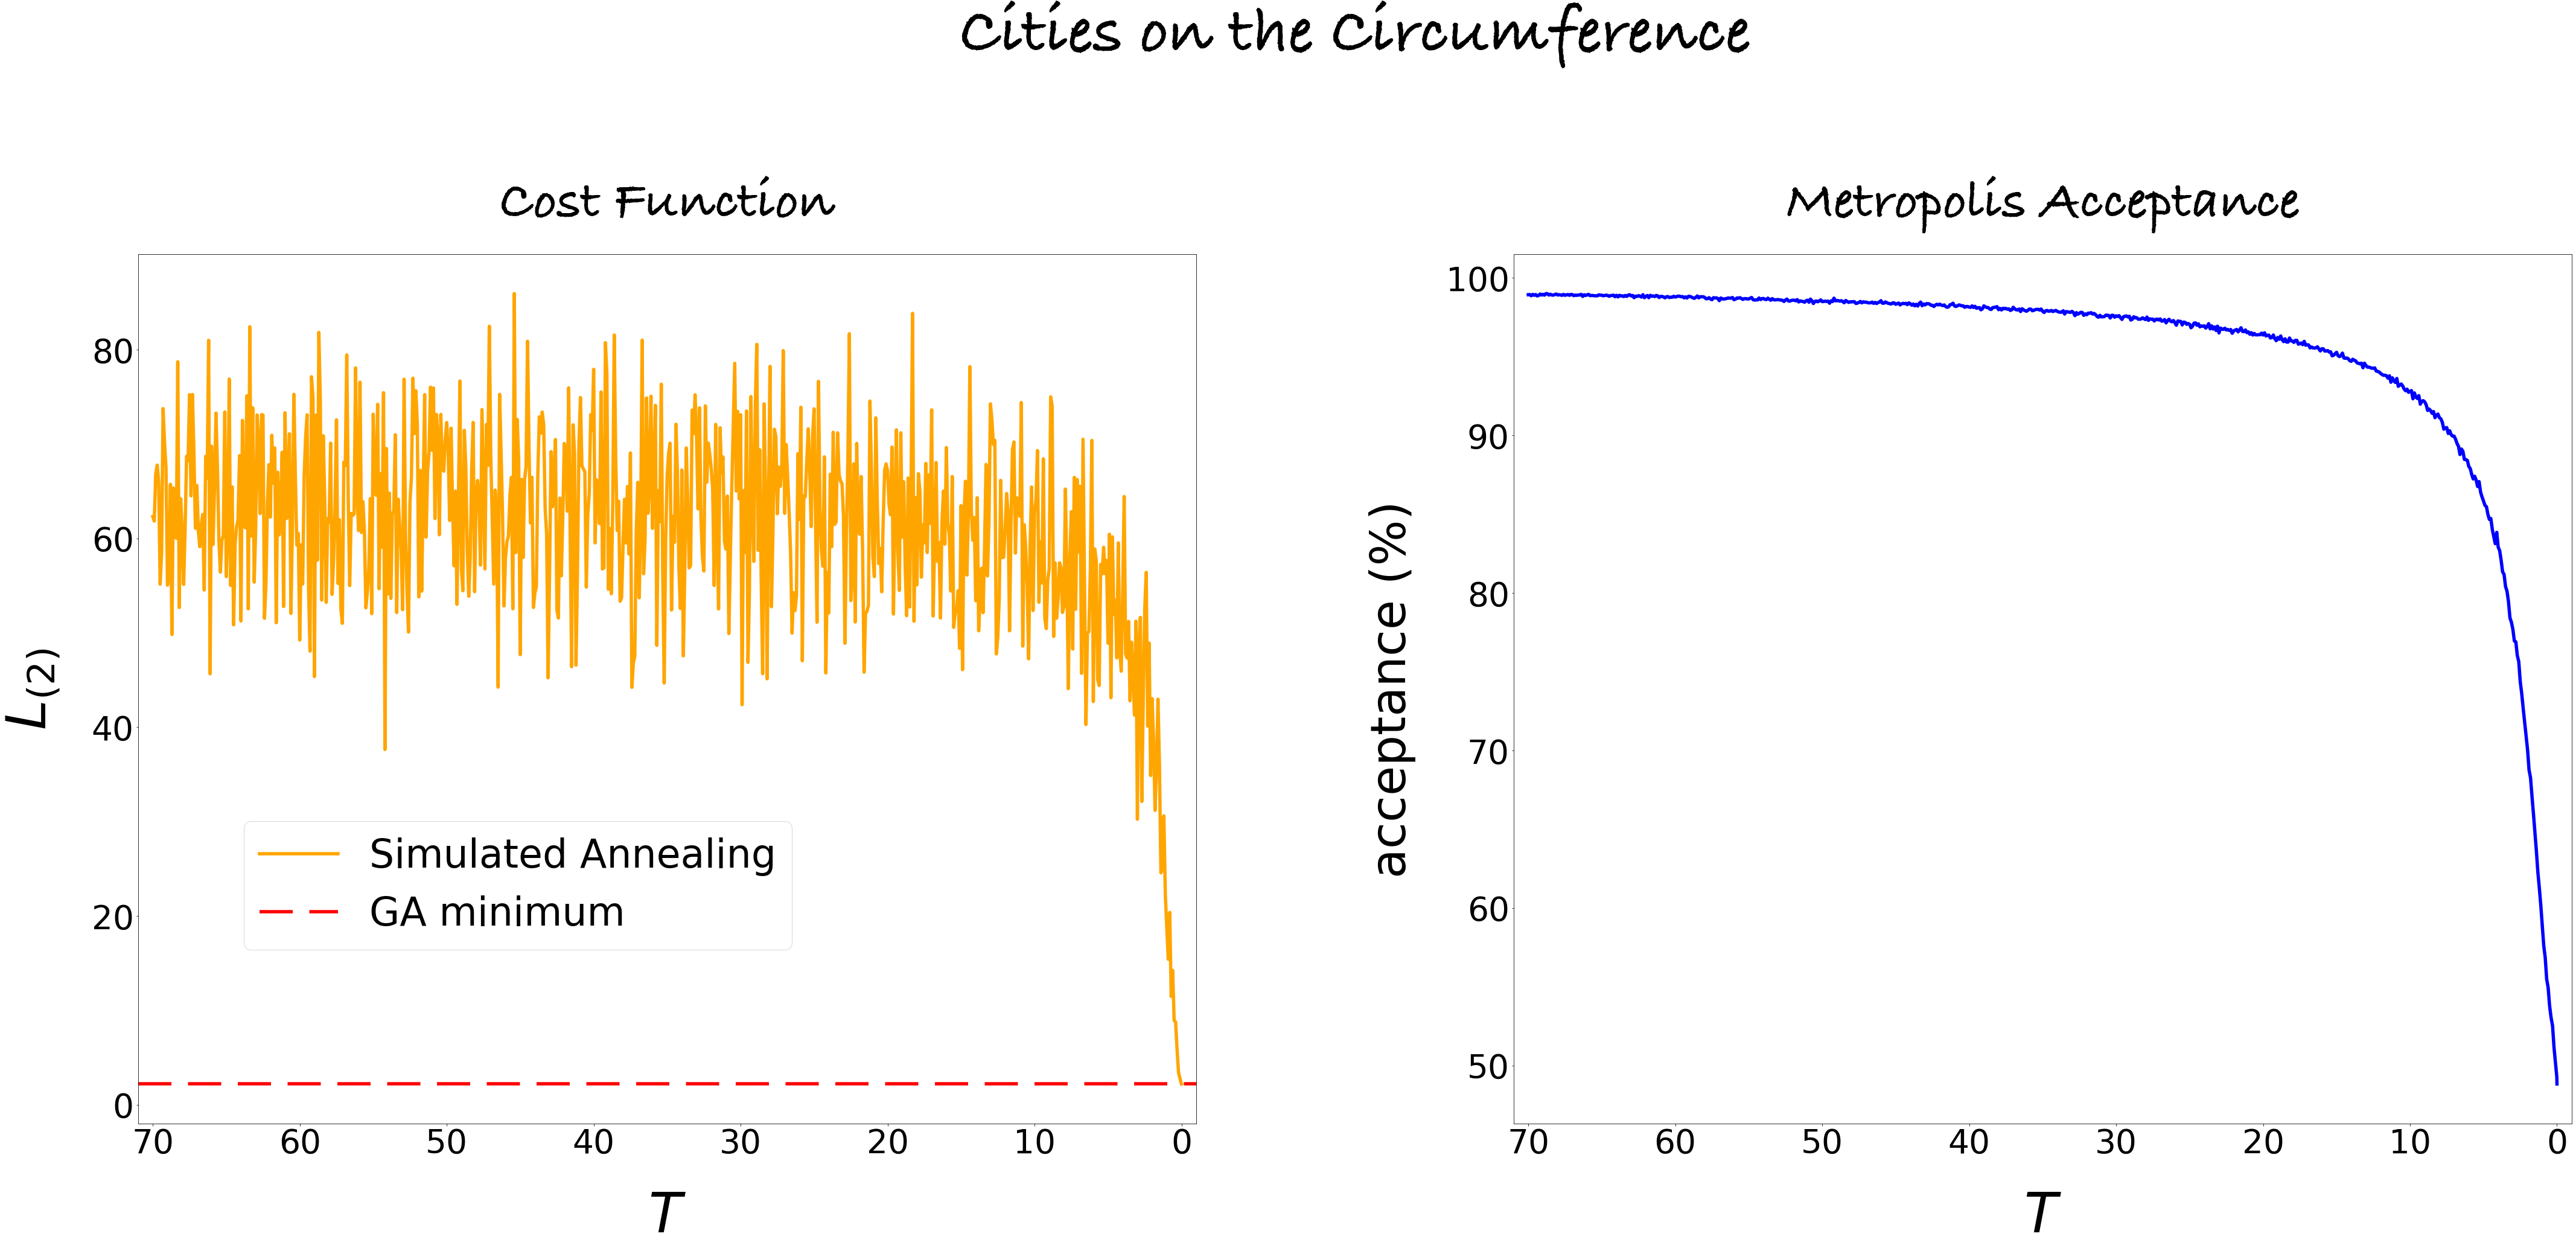

In [4]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Cities on the Circumference', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(max(T)+1, min(T)-1)
plt.plot(T, L_circ_SA, linewidth=5.5, color='orange', label='Simulated Annealing')
plt.axhline(y=L_circ_GA[len(L_circ_GA)-1], linewidth=5.5,
             color='red', ls='--', dashes=(10, 5), label='GA minimum')
plt.legend(fontsize=65, loc=(0.1, 0.2))

plt.subplot(1, 2, 2)
plt.title('Metropolis Acceptance', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('acceptance (%)', fontsize=80, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(max(T)+1, min(T)-1)
plt.plot(T, acceptance_circ, linewidth=5.5, color='blue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

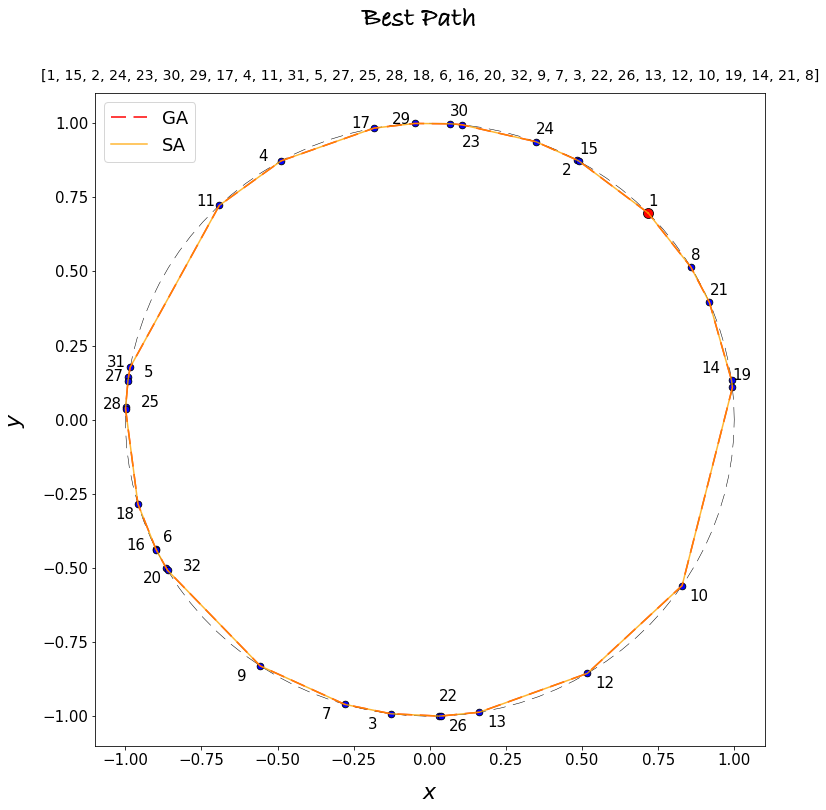

In [5]:
#Best Path
###
#Genetic Algorithm
###
p_GA=[]
for i in range(N_city):
    p_GA.append(paths_GA[len(paths_GA)-1][i])

###
#Simulated Annealing
###
p_SA=[]
for i in range(N_city):
    p_SA.append(paths_SA[len(paths_SA)-1][i])

plt.figure(figsize=[12, 12])
plt.suptitle('Best Path', y=0.98, fontname = 'Bradley Hand', fontsize=28)
plt.title(str(p_SA), y=1.012, fontsize=14)
plt.xlabel('$ x $', fontsize=22, labelpad=15)
plt.ylabel('$ y $', fontsize=22, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x1, x2, linewidth=0.5, color='black', linestyle='--', dashes=(25, 15))
plt.scatter(x_cities[0], y_cities[0], marker='o', color='red', 
            edgecolor='black', linewidths=0.8, s=100)
plt.scatter(x_cities[1:], y_cities[1:], marker='o', color='blue',
            edgecolor='black', linewidths=0.8, s=45)

for w in range(N_city):
    if(x_cities[w]>0.0 and y_cities[w]>0):
        if(w+1==2):
            plt.annotate(str(w+1), (x_cities[w]-0.05, y_cities[w]-0.05), fontsize=15)
        elif(w+1==14):
            plt.annotate(str(w+1), (x_cities[w]-0.1, y_cities[w]+0.025), fontsize=15)
        elif(w+1==23):
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]-0.075), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]+0.025), fontsize=15)
    elif(x_cities[w]>0.0 and y_cities[w]<0):
        if(w+1==22):
            plt.annotate(str(w+1), (x_cities[w], y_cities[w]+0.05), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w]+0.025, y_cities[w]-0.05), fontsize=15)
    elif(x_cities[w]<0.0 and y_cities[w]<0):
        if(w+1==6):
            plt.annotate(str(w+1), (x_cities[w]+0.025, y_cities[w]+0.025), fontsize=15)
        elif(w+1==16):
            plt.annotate(str(w+1), (x_cities[w]-0.1, y_cities[w]), fontsize=15)
        elif(w+1==32):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        else:
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]-0.05), fontsize=15)
    elif(x_cities[w]<0.0 and y_cities[w]>0):
        if(w+1==5):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        elif(w+1==25):
            plt.annotate(str(w+1), (x_cities[w]+0.05, y_cities[w]), fontsize=15)
        elif(w+1==28):
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]), fontsize=15)
        else:    
            plt.annotate(str(w+1), (x_cities[w]-0.075, y_cities[w]), fontsize=15)
        
        
plt.plot(xs_GA, ys_GA, lw=1.5, color='red', linestyle='--', dashes=(10, 5), ms=10, label='GA')
plt.plot(xs_SA, ys_SA, lw=1.5, color='orange', alpha=0.8, linestyle='-', ms=10, label='SA')
plt.legend(fontsize=18, loc='upper left')
plt.show()

In the simplest case, where cities are randomly placed on a circumference, the SA reaches the same minimum as the GA, and the two best paths found are perfectly coincident: the <font color='orange'>orange solid line (SA)</font> and the <font color='red'>red dashed line (GA)</font> are the same, as is the actual route. <br>
Note from the two figures related to the optimization curves that for most temperatures the length of the best path oscillates around a high value, and then drops around temperature $ 3 $. Also from the graph relating to the acceptance of the Metropolis as a function of the temperature I notice the following behavior (expected): at high temperature moves with or against the gradient are accepted with almost equal probability while at low temperature only downhill moves are accepted. For this reason the acceptance is very high and then halves at the same temperature in which the length of the best route collapses.

In [6]:
###################
#load the data
###################
x_square, y_square = np.loadtxt("10.1/cities_in_square.dat", usecols=(2, 3), unpack=True)


#Cost Function
###
#Genetic Algorithm
###
L_square_GA = np.loadtxt("../Exercise 09/09.1/Square/L.dat", usecols=1, unpack=True)

###
#Simulated Annealing
###
L_square_SA, acceptance_square = np.loadtxt("10.1/Square/L.dat", usecols=(1,2), unpack=True)


#Best Path
###
#Genetic Algorithm
###
paths_square_GA = np.loadtxt("../Exercise 09/09.1/Square/optimized_path.dat",
                             dtype='int', usecols=np.arange(1, N_city+1))
vertices_square_GA = []
codes_square_GA = []
for j in paths_square_GA[len(paths_square_GA)-1]:
    vertices_square_GA.append((x_square[j-1], y_square[j-1]))

vertices_square_GA.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_square_GA.append(Path.MOVETO)
    else:
        codes_square_GA.append(Path.LINETO)

xs_square_GA, ys_square_GA = zip(*vertices_square_GA)

###
#Simulated Annealing
###
x_square, y_square = np.loadtxt("10.1/cities_in_square.dat", usecols=(2, 3), unpack=True)
paths_square_SA = np.loadtxt("10.1/Square/optimized_path.dat", dtype='int', usecols=np.arange(1, N_city+1))
vertices_square_SA = []
codes_square_SA = []
for j in paths_square_SA[len(paths_square_SA)-1]:
    vertices_square_SA.append((x_square[j-1], y_square[j-1]))

vertices_square_SA.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_square_SA.append(Path.MOVETO)
    else:
        codes_square_SA.append(Path.LINETO)

xs_square_SA, ys_square_SA = zip(*vertices_square_SA)

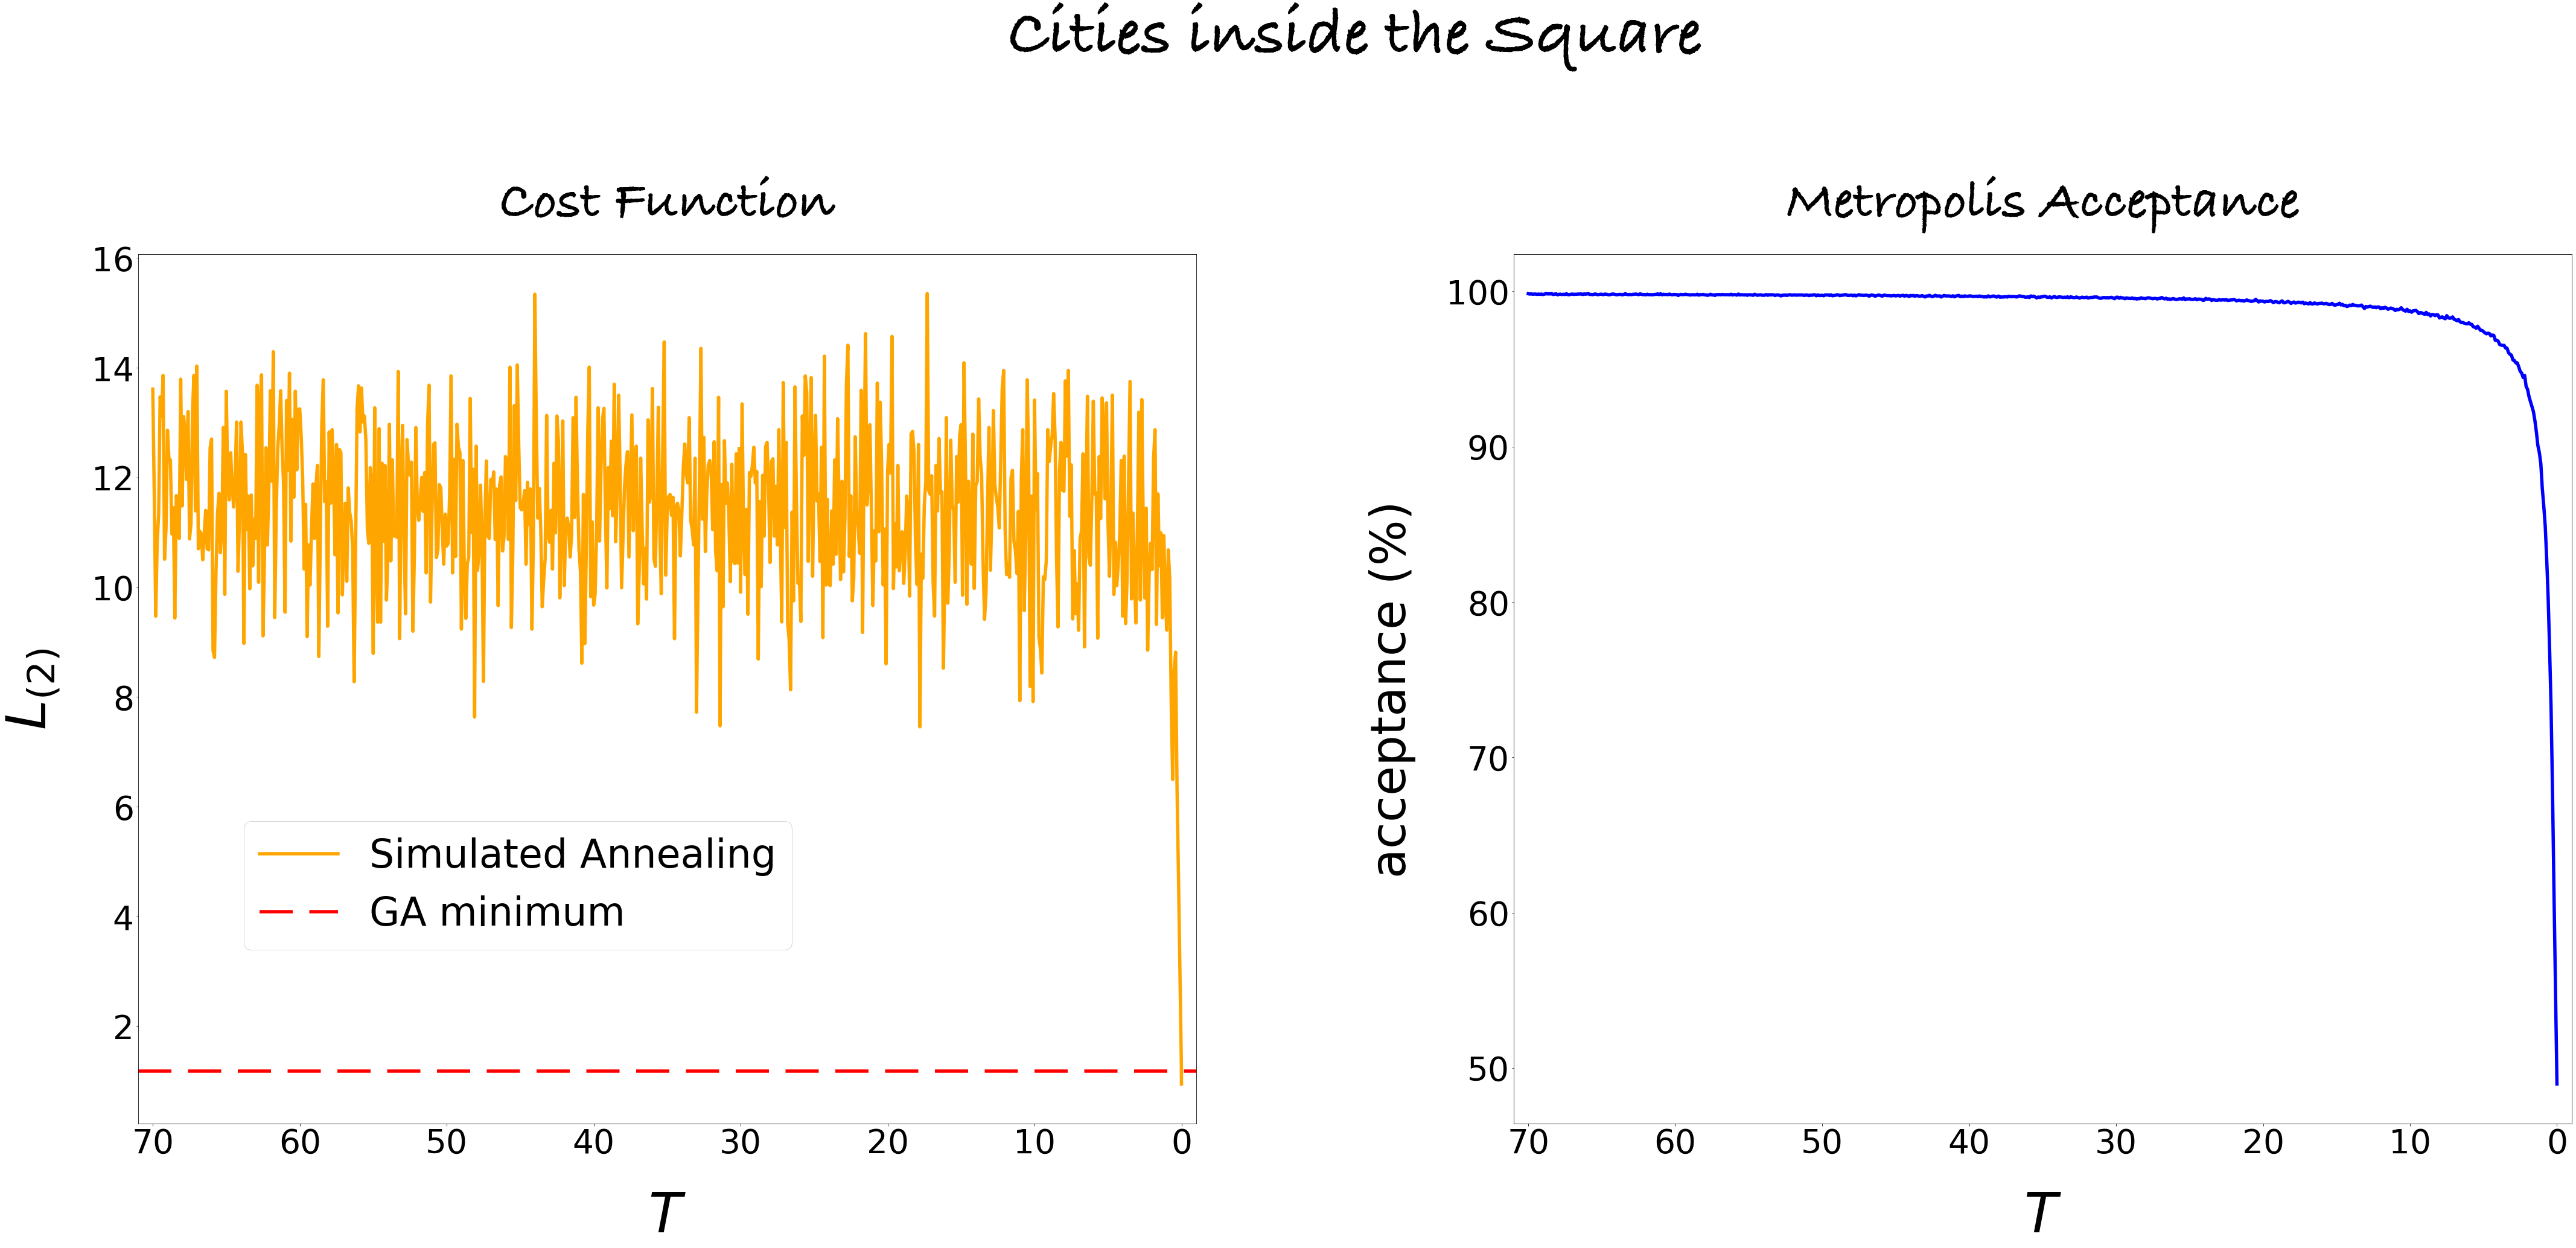

In [7]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Cities inside the Square', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(max(T)+1, min(T)-1)
plt.plot(T, L_square_SA, linewidth=5.5, color='orange', label='Simulated Annealing')
plt.axhline(y=L_square_GA[len(L_square_GA)-1], linewidth=5.5,
             color='red', ls='--', dashes=(10, 5), label='GA minimum')
plt.legend(fontsize=65, loc=(0.1, 0.2))

plt.subplot(1, 2, 2)
plt.title('Metropolis Acceptance', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('acceptance (%)', fontsize=80, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(max(T)+1, min(T)-1)
plt.plot(T, acceptance_square, linewidth=5.5, color='blue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

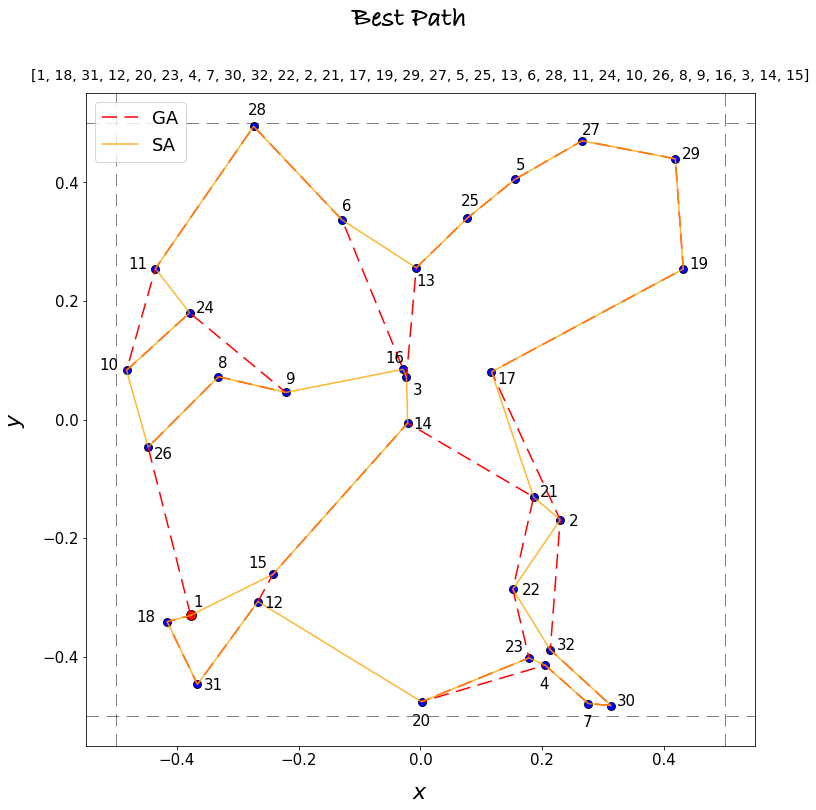

In [8]:
#Best Path
p_square_SA=[]
for i in range(N_city):
    p_square_SA.append(paths_square_SA[len(paths_square_SA)-1][i])

plt.figure(figsize=[12, 12])
plt.suptitle('Best Path', y=0.98, fontname = 'Bradley Hand', fontsize=28)
plt.title(str(p_square_SA), y=1.012, fontsize=14)
plt.xlabel('$ x $', fontsize=22, labelpad=15)
plt.ylabel('$ y $', fontsize=22, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#SQUARE
plt.axhline(y=+0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=0.5, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=0.8, s=100)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=0.8, s=65)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=15)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=15)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=15)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=15)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=15)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=15)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=15)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=15)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=15)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=15)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=15)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=15)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=15)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=15)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=15)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=15)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=15)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=15)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=15)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=15)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=15)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=15)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=15)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=15)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=15)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=15)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=15)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=15)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=15)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=15)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=15)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=15)
#PATH
plt.plot(xs_square_GA, ys_square_GA, lw=1.5, color='red', linestyle='--', dashes=(10, 5), ms=10, label='GA')
plt.plot(xs_square_SA, ys_square_SA, lw=1.5, color='orange', alpha=0.8, linestyle='-', ms=10, label='SA')
plt.legend(fontsize=18, loc='upper left')
plt.show()

In this more complicated case of the square the SA is even able to reach a better minimum than the GA, and in fact the path obtained by the optimization has a shorter length ($ L = 0.9488 $) and is different from the optimal one found with the GA. <br>
The considerations made before compared to the curve trends in the case of circumference also apply in this situation.


As done in <font color='orange'>Numerical Exercise 9</font>, to complete the speech, I show below the animations related to the fictitious cooling down of the system that leads to the optimization of the paths at the lowest temperature.

<div class="alert alert-warning" role="alert">
 
  <b>Warning:</b> <br>
  These two animations are not visible in the jupyters-notebook of the `Github Repository` related to the   
  delivery of exercises for the exam (even if downloaded and run the cell locally).
    
</div>

In [9]:
#Image('10.1/Circumference/circ_optimization.gif')

In [10]:
#Image('10.1/Square/square_optimization.gif')

## <font color='blue'>Exercise 10.2</font>

In this last exercise I parallelize with `MPI` libraries my Genetic Algorithm code in order to solve the TSP by performing a Genetic Search with 4 parallel nodes of the optimal path: each process performs an independent GA search in the case of <font color='blue'>$ 32 $ cities randomly placed inside a square</font>. <br>
I study two cases: the first without making any communication between the four Processes that I use during the parallel research; the second performing the exchange of the **best chromosome** between two **random Processes** every $ N_{migr} = 6 $ generations ($ N_{gen} = 600 $ is the total number of generations created, i.e. I perform $ 100 $ chromosomes exchange); this message exchange is implemented through **Bidirectional Communication**, using the `Mpi_Send` and `Mpi_Recv` functions. <br>
I show below the comparison between the curves and the best final paths obtained by the four nodes used in these two cases.

In [11]:
###################
#load the data
#No comm. case
###################
#Cities
x_square, y_square = np.loadtxt("10.2/cities_in_square.dat", usecols=(2, 3), unpack=True)


#Cost Function
L_rank0 = np.loadtxt("10.2/No Communications/rank0/L_rank_0.dat", usecols=1, unpack=True)
L_rank1 = np.loadtxt("10.2/No Communications/rank1/L_rank_1.dat", usecols=1, unpack=True)
L_rank2 = np.loadtxt("10.2/No Communications/rank2/L_rank_2.dat", usecols=1, unpack=True)
L_rank3 = np.loadtxt("10.2/No Communications/rank3/L_rank_3.dat", usecols=1, unpack=True)
L_ave_rank0 = np.loadtxt("10.2/No Communications/rank0/L_ave_rank_0.dat", usecols=1, unpack=True)
L_ave_rank1 = np.loadtxt("10.2/No Communications/rank1/L_ave_rank_1.dat", usecols=1, unpack=True)
L_ave_rank2 = np.loadtxt("10.2/No Communications/rank2/L_ave_rank_2.dat", usecols=1, unpack=True)
L_ave_rank3 = np.loadtxt("10.2/No Communications/rank3/L_ave_rank_3.dat", usecols=1, unpack=True)

#Best Path
paths_rank0 = np.loadtxt("10.2/No Communications/rank0/optimized_path_rank_0.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank1 = np.loadtxt("10.2/No Communications/rank1/optimized_path_rank_1.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank2 = np.loadtxt("10.2/No Communications/rank2/optimized_path_rank_2.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank3 = np.loadtxt("10.2/No Communications/rank3/optimized_path_rank_3.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))

###
#Draw rank 0
###
vertices_rank0 = []
codes_rank0 = []
for j in paths_rank0[len(paths_rank0)-1]:
    vertices_rank0.append((x_square[j-1], y_square[j-1]))

vertices_rank0.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank0.append(Path.MOVETO)
    else:
        codes_rank0.append(Path.LINETO)

xs_rank0, ys_rank0 = zip(*vertices_rank0)

###
#Draw rank 1
###
vertices_rank1 = []
codes_rank1 = []
for j in paths_rank1[len(paths_rank1)-1]:
    vertices_rank1.append((x_square[j-1], y_square[j-1]))

vertices_rank1.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank1.append(Path.MOVETO)
    else:
        codes_rank1.append(Path.LINETO)

xs_rank1, ys_rank1 = zip(*vertices_rank1)

###
#Draw rank 2
###
vertices_rank2 = []
codes_rank2 = []
for j in paths_rank2[len(paths_rank2)-1]:
    vertices_rank2.append((x_square[j-1], y_square[j-1]))
    
vertices_rank2.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank2.append(Path.MOVETO)
    else:
        codes_rank2.append(Path.LINETO)

xs_rank2, ys_rank2 = zip(*vertices_rank2)

###
#Draw rank 3
###
vertices_rank3 = []
codes_rank3 = []
for j in paths_rank3[len(paths_rank3)-1]:
    vertices_rank3.append((x_square[j-1], y_square[j-1]))

vertices_rank3.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank3.append(Path.MOVETO)
    else:
        codes_rank3.append(Path.LINETO)

xs_rank3, ys_rank3 = zip(*vertices_rank3)

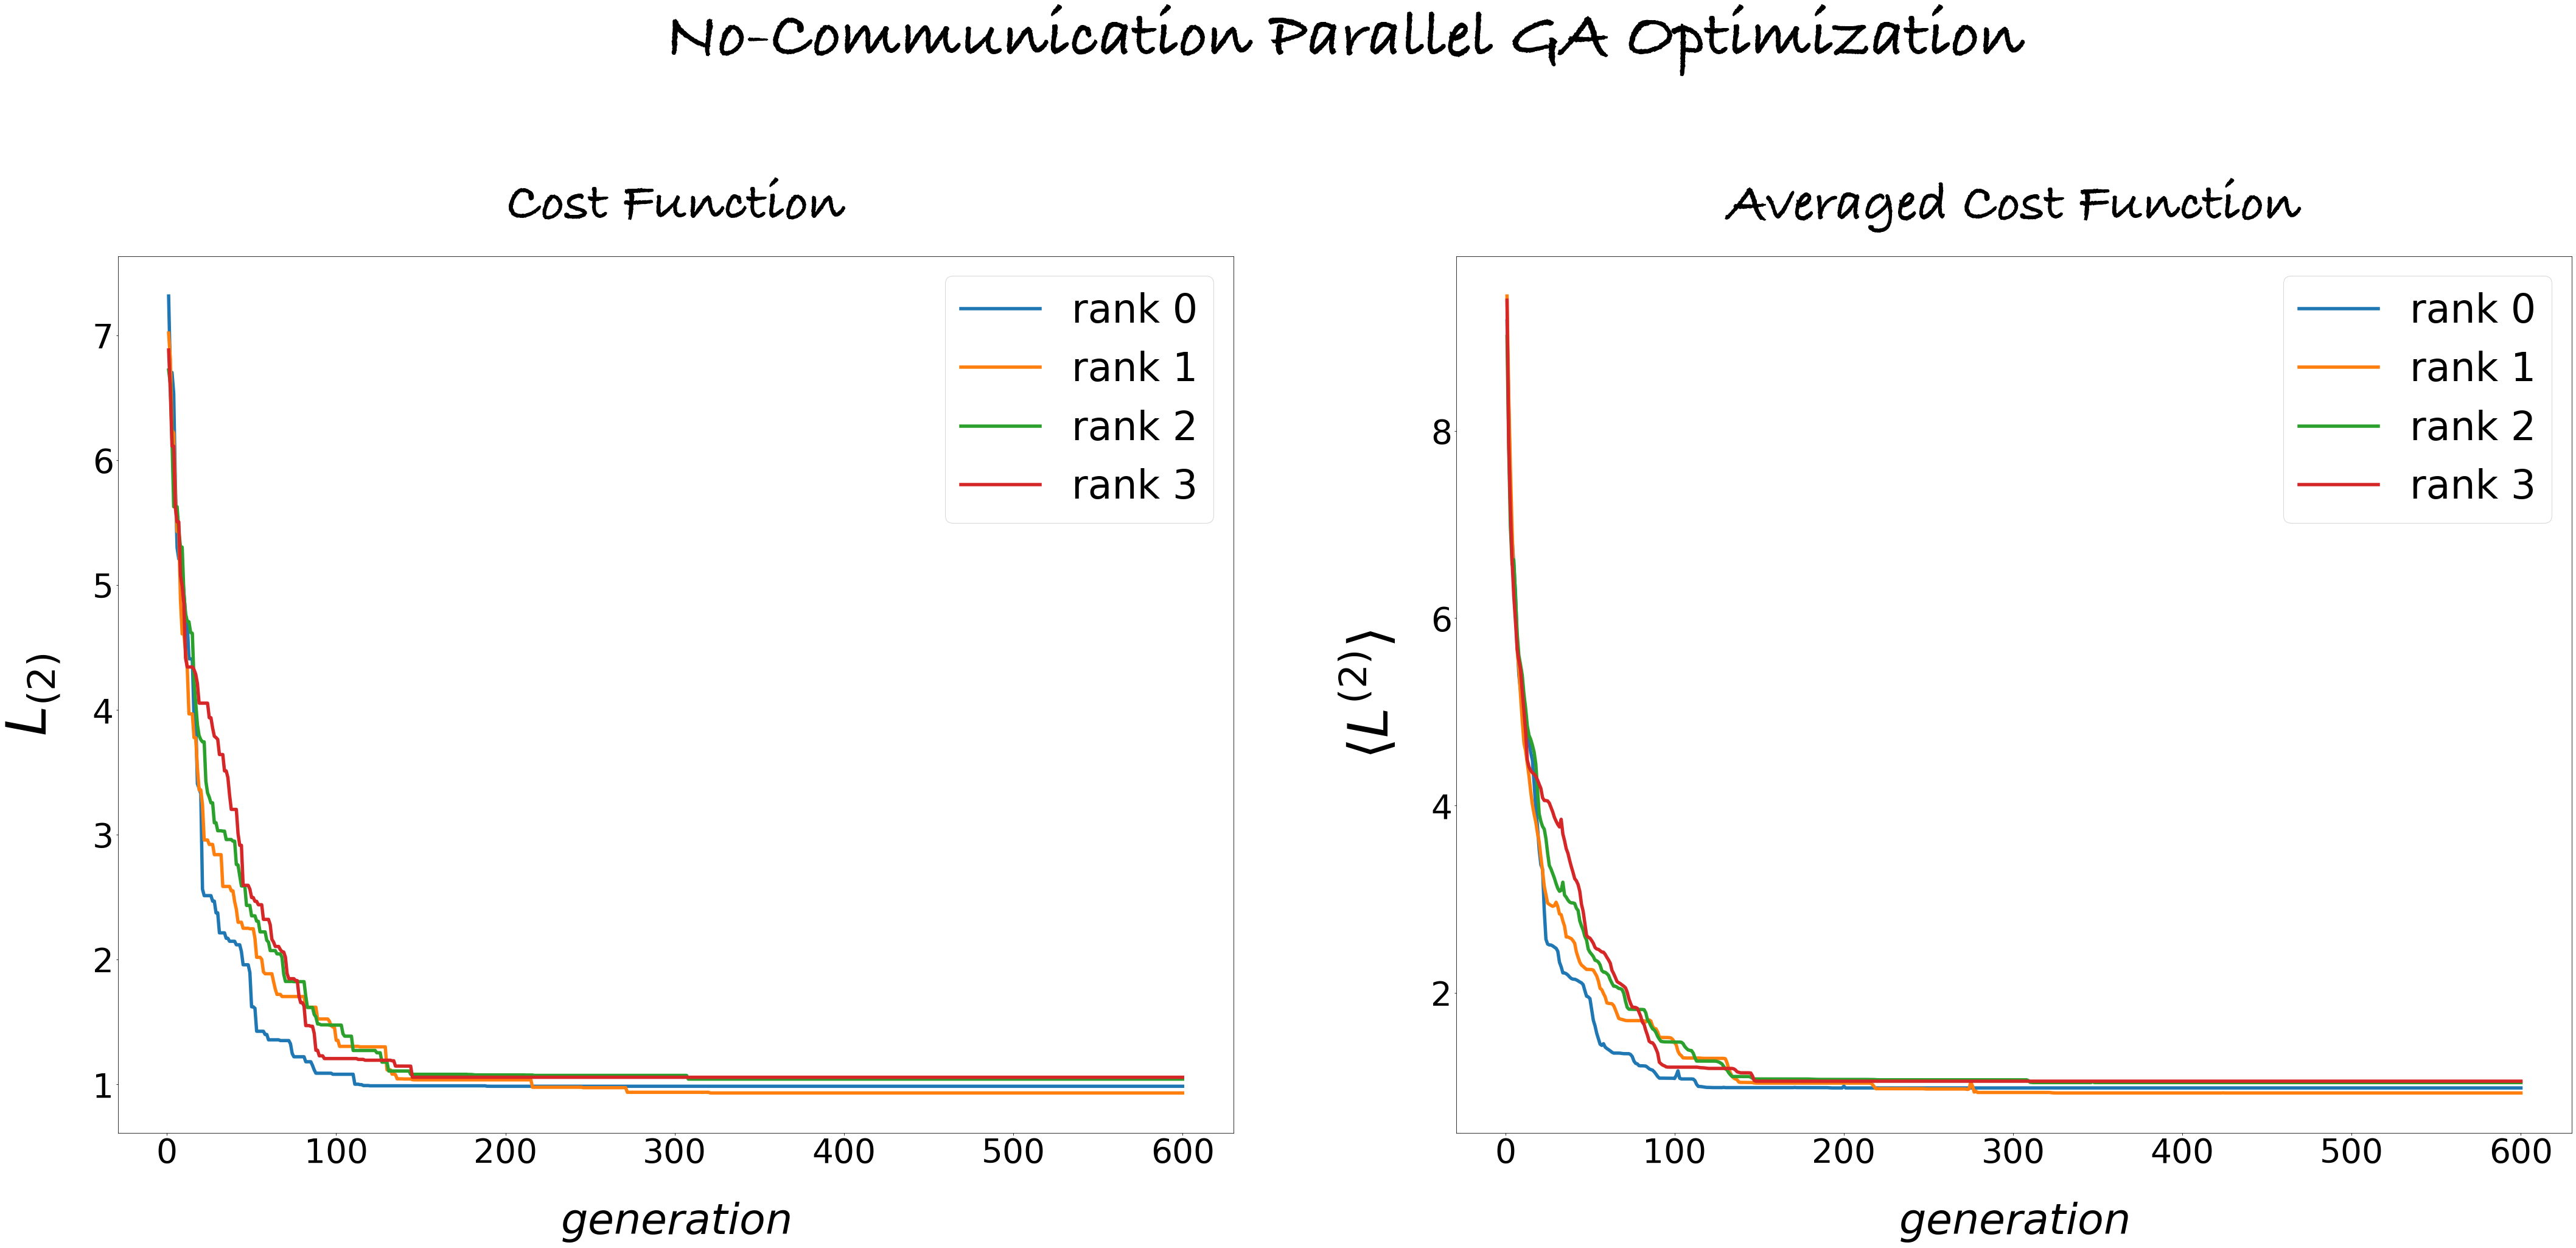

In [12]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('No-Communication Parallel GA Optimization', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation[1:], L_rank0, linewidth=5.5, label='rank 0')
plt.plot(generation[1:], L_rank1, linewidth=5.5, label='rank 1')
plt.plot(generation[1:], L_rank2, linewidth=5.5, label='rank 2')
plt.plot(generation[1:], L_rank3, linewidth=5.5, label='rank 3')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Averaged Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$\\langle L^{(2)} \\rangle$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation[1:], L_ave_rank0, linewidth=5.5, label='rank 0')
plt.plot(generation[1:], L_ave_rank1, linewidth=5.5, label='rank 1')
plt.plot(generation[1:], L_ave_rank2, linewidth=5.5, label='rank 2')
plt.plot(generation[1:], L_ave_rank3, linewidth=5.5, label='rank 3')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()
print('\n\n')

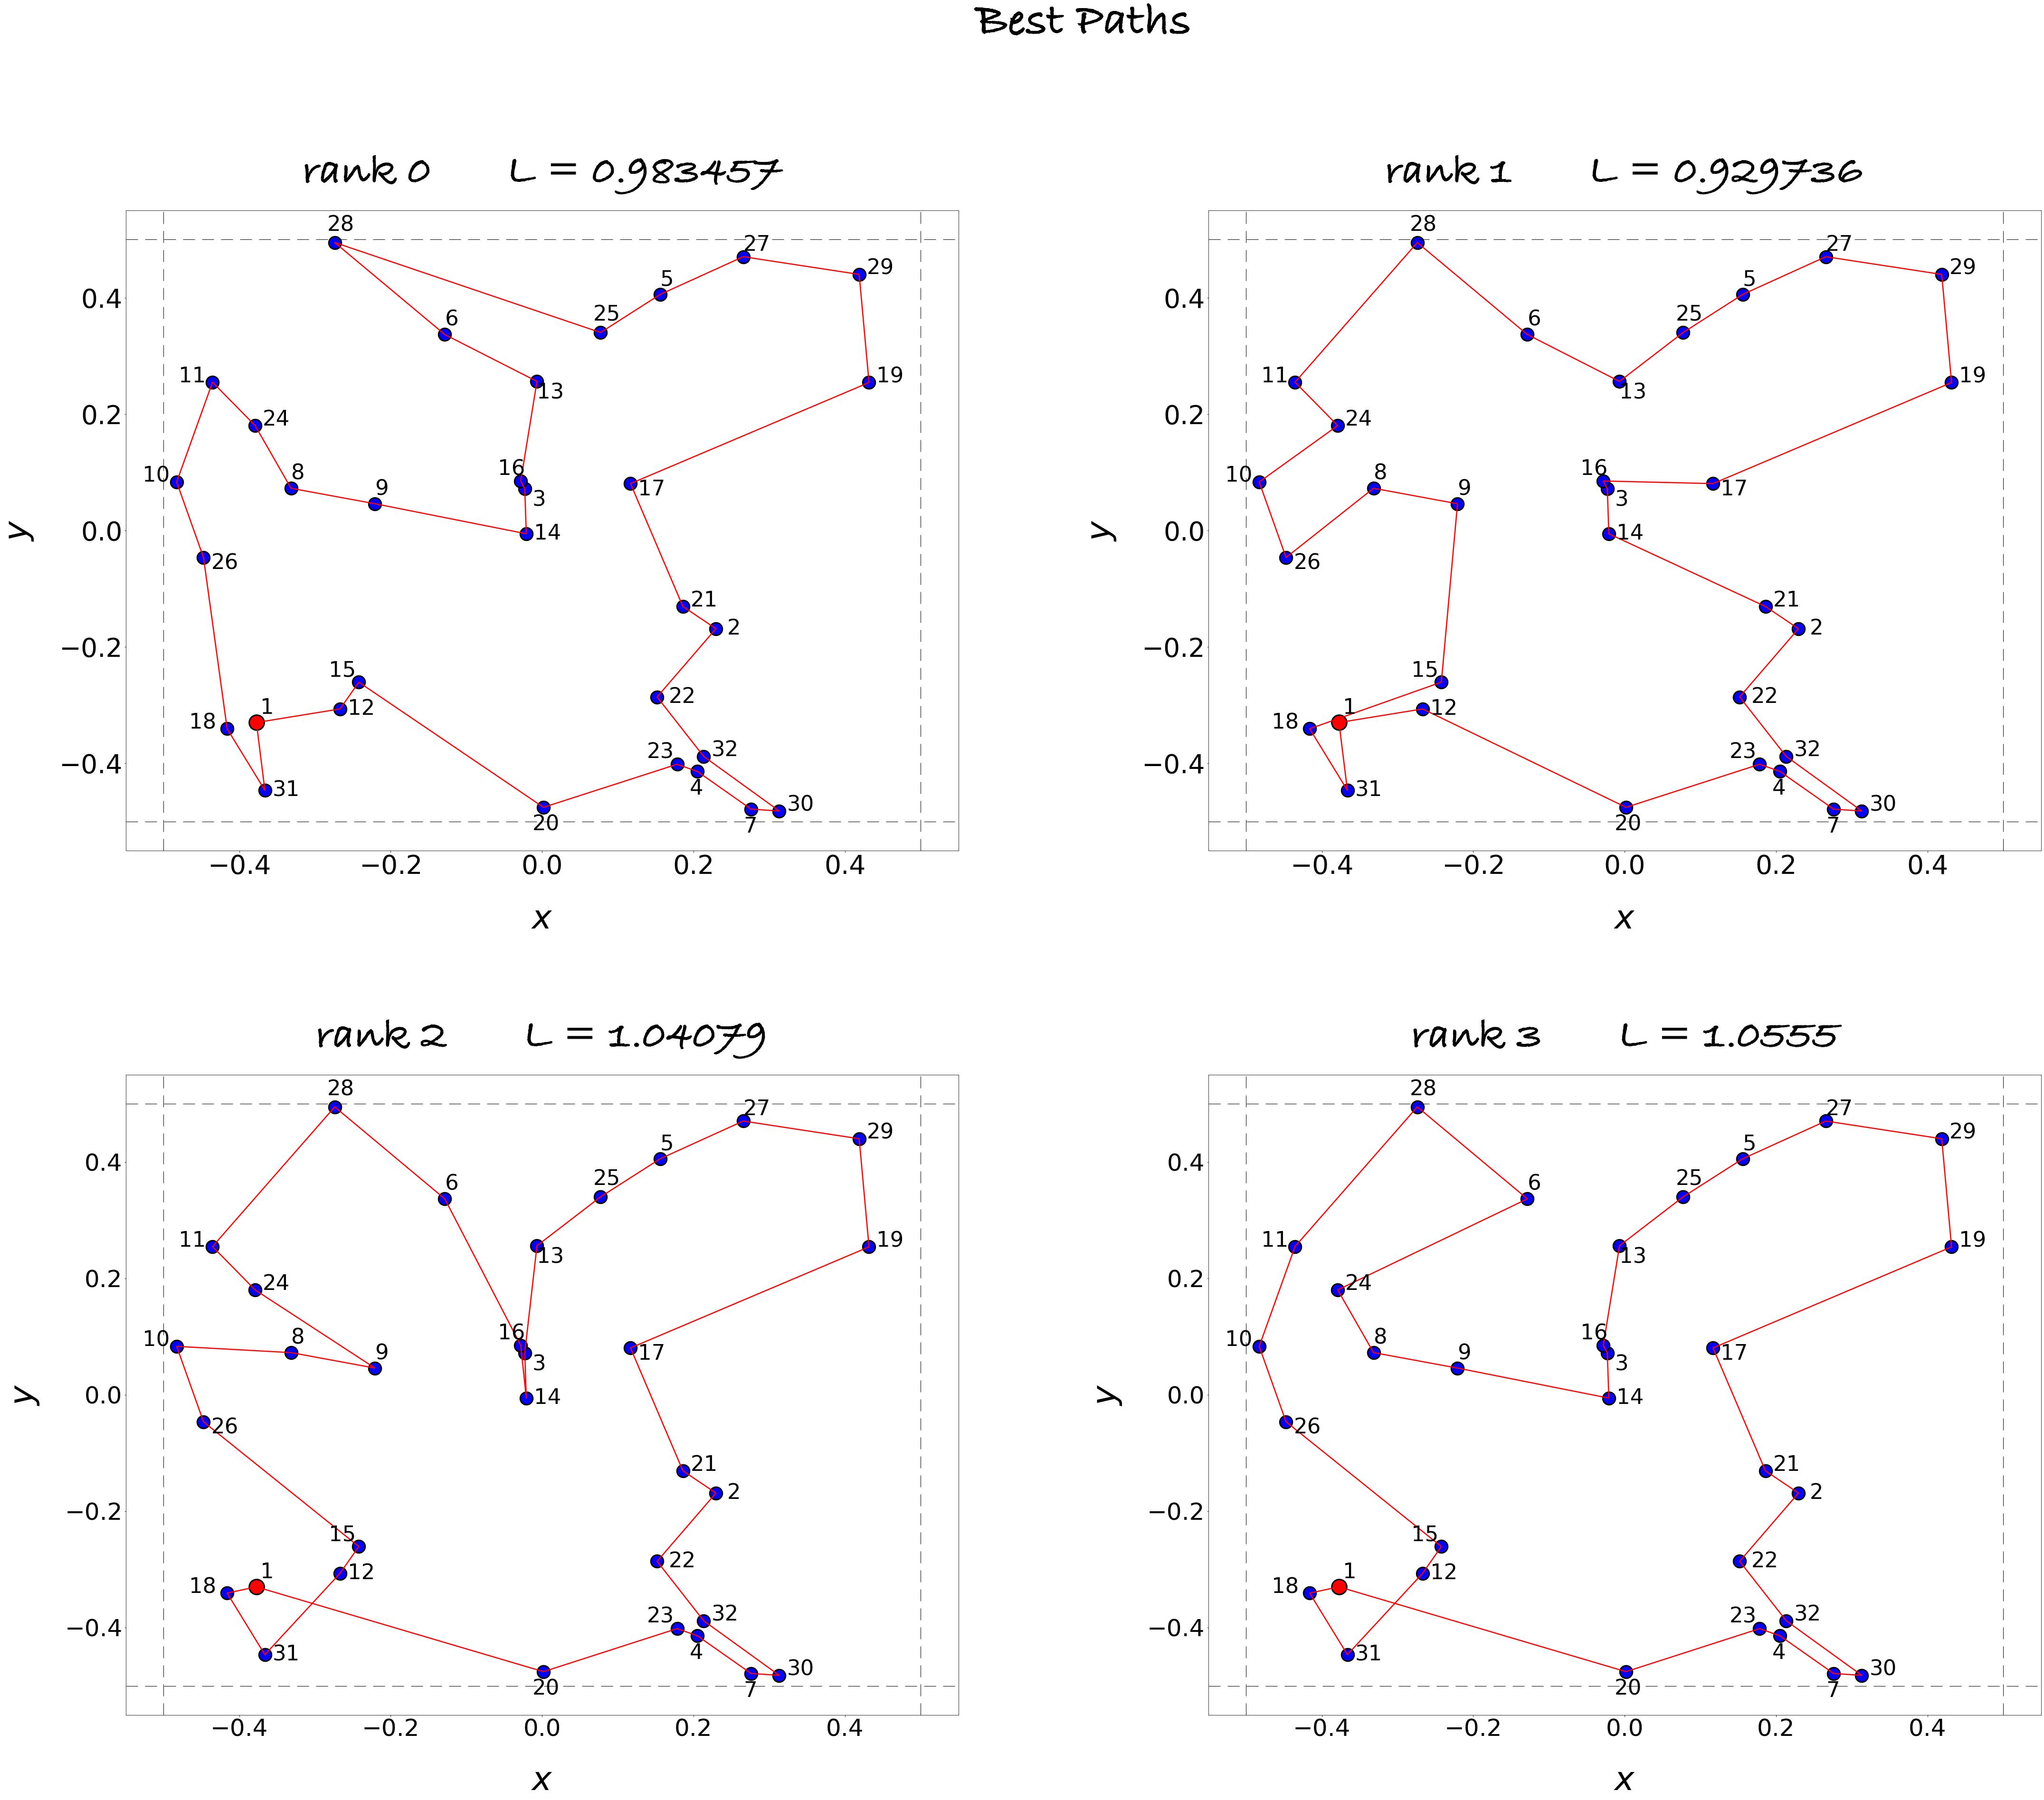

In [13]:
#Best Path
#Paths
p_rank0=[]
for i in range(N_city):
    p_rank0.append(paths_rank0[len(paths_rank0)-1][i])
p_rank1=[]
for i in range(N_city):
    p_rank1.append(paths_rank1[len(paths_rank1)-1][i])
p_rank2=[]
for i in range(N_city):
    p_rank2.append(paths_rank2[len(paths_rank2)-1][i])
p_rank3=[]
for i in range(N_city):
    p_rank3.append(paths_rank3[len(paths_rank3)-1][i])
    
#Draw
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Best Paths', y=1.01, fontname = 'Bradley Hand', fontsize=100)


plt.subplot(2, 2, 1)
plt.title('rank 0       L = ' + str(L_rank0[len(L_rank0)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank0, ys_rank0, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 2)
plt.title('rank 1       L = ' + str(L_rank1[len(L_rank1)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank1, ys_rank1, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 3)
plt.title('rank 2       L = ' + str(L_rank2[len(L_rank2)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank2, ys_rank2, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 4)
plt.title('rank 3       L = ' + str(L_rank3[len(L_rank3)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank3, ys_rank3, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.35)
plt.show()

Each node finds a path of minimum length along different minimization curves, and getting different final paths, as it should be: the Genetic Algorithm performs a stochastic research of minimum, and the populations in the various nodes are randomly initialized differently. <br>
For all nodes the optimal path found is reasonable. The advantage of running the code in parallel is that you can choose between four possible minimum, which allows you to better explore the possible solutions and get closer to the real minimum of the problem with more probability. In this case (without communications) each Process takes about $ 18 $ seconds to complete the search for its minimum.<br>
Let’s now see what happens by applying $ 100 $ random Bidirectional Communications.

In [14]:
###################
#load the data
#Comm. case
###################
#Cities
x_square, y_square = np.loadtxt("10.2/cities_in_square.dat", usecols=(2, 3), unpack=True)


#Cost Function
L_rank0 = np.loadtxt("10.2/Communications/rank0/L_rank_0.dat", usecols=1, unpack=True)
L_rank1 = np.loadtxt("10.2/Communications/rank1/L_rank_1.dat", usecols=1, unpack=True)
L_rank2 = np.loadtxt("10.2/Communications/rank2/L_rank_2.dat", usecols=1, unpack=True)
L_rank3 = np.loadtxt("10.2/Communications/rank3/L_rank_3.dat", usecols=1, unpack=True)
L_ave_rank0 = np.loadtxt("10.2/Communications/rank0/L_ave_rank_0.dat", usecols=1, unpack=True)
L_ave_rank1 = np.loadtxt("10.2/Communications/rank1/L_ave_rank_1.dat", usecols=1, unpack=True)
L_ave_rank2 = np.loadtxt("10.2/Communications/rank2/L_ave_rank_2.dat", usecols=1, unpack=True)
L_ave_rank3 = np.loadtxt("10.2/Communications/rank3/L_ave_rank_3.dat", usecols=1, unpack=True)

#Best Path
paths_rank0 = np.loadtxt("10.2/Communications/rank0/optimized_path_rank_0.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank1 = np.loadtxt("10.2/Communications/rank1/optimized_path_rank_1.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank2 = np.loadtxt("10.2/Communications/rank2/optimized_path_rank_2.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))
paths_rank3 = np.loadtxt("10.2/Communications/rank3/optimized_path_rank_3.dat", 
                         dtype='int', usecols=np.arange(1, N_city+1))

###
#Draw rank 0
###
vertices_rank0 = []
codes_rank0 = []
for j in paths_rank0[len(paths_rank0)-1]:
    vertices_rank0.append((x_square[j-1], y_square[j-1]))

vertices_rank0.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank0.append(Path.MOVETO)
    else:
        codes_rank0.append(Path.LINETO)

xs_rank0, ys_rank0 = zip(*vertices_rank0)

###
#Draw rank 1
###
vertices_rank1 = []
codes_rank1 = []
for j in paths_rank1[len(paths_rank1)-1]:
    vertices_rank1.append((x_square[j-1], y_square[j-1]))

vertices_rank1.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank1.append(Path.MOVETO)
    else:
        codes_rank1.append(Path.LINETO)

xs_rank1, ys_rank1 = zip(*vertices_rank1)

###
#Draw rank 2
###
vertices_rank2 = []
codes_rank2 = []
for j in paths_rank2[len(paths_rank2)-1]:
    vertices_rank2.append((x_square[j-1], y_square[j-1]))
    
vertices_rank2.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank2.append(Path.MOVETO)
    else:
        codes_rank2.append(Path.LINETO)

xs_rank2, ys_rank2 = zip(*vertices_rank2)

###
#Draw rank 3
###
vertices_rank3 = []
codes_rank3 = []
for j in paths_rank3[len(paths_rank3)-1]:
    vertices_rank3.append((x_square[j-1], y_square[j-1]))

vertices_rank3.append((x_square[0], y_square[0]))
    
for k in range(N_city+1):
    if(k==0):
        codes_rank3.append(Path.MOVETO)
    else:
        codes_rank3.append(Path.LINETO)

xs_rank3, ys_rank3 = zip(*vertices_rank3)

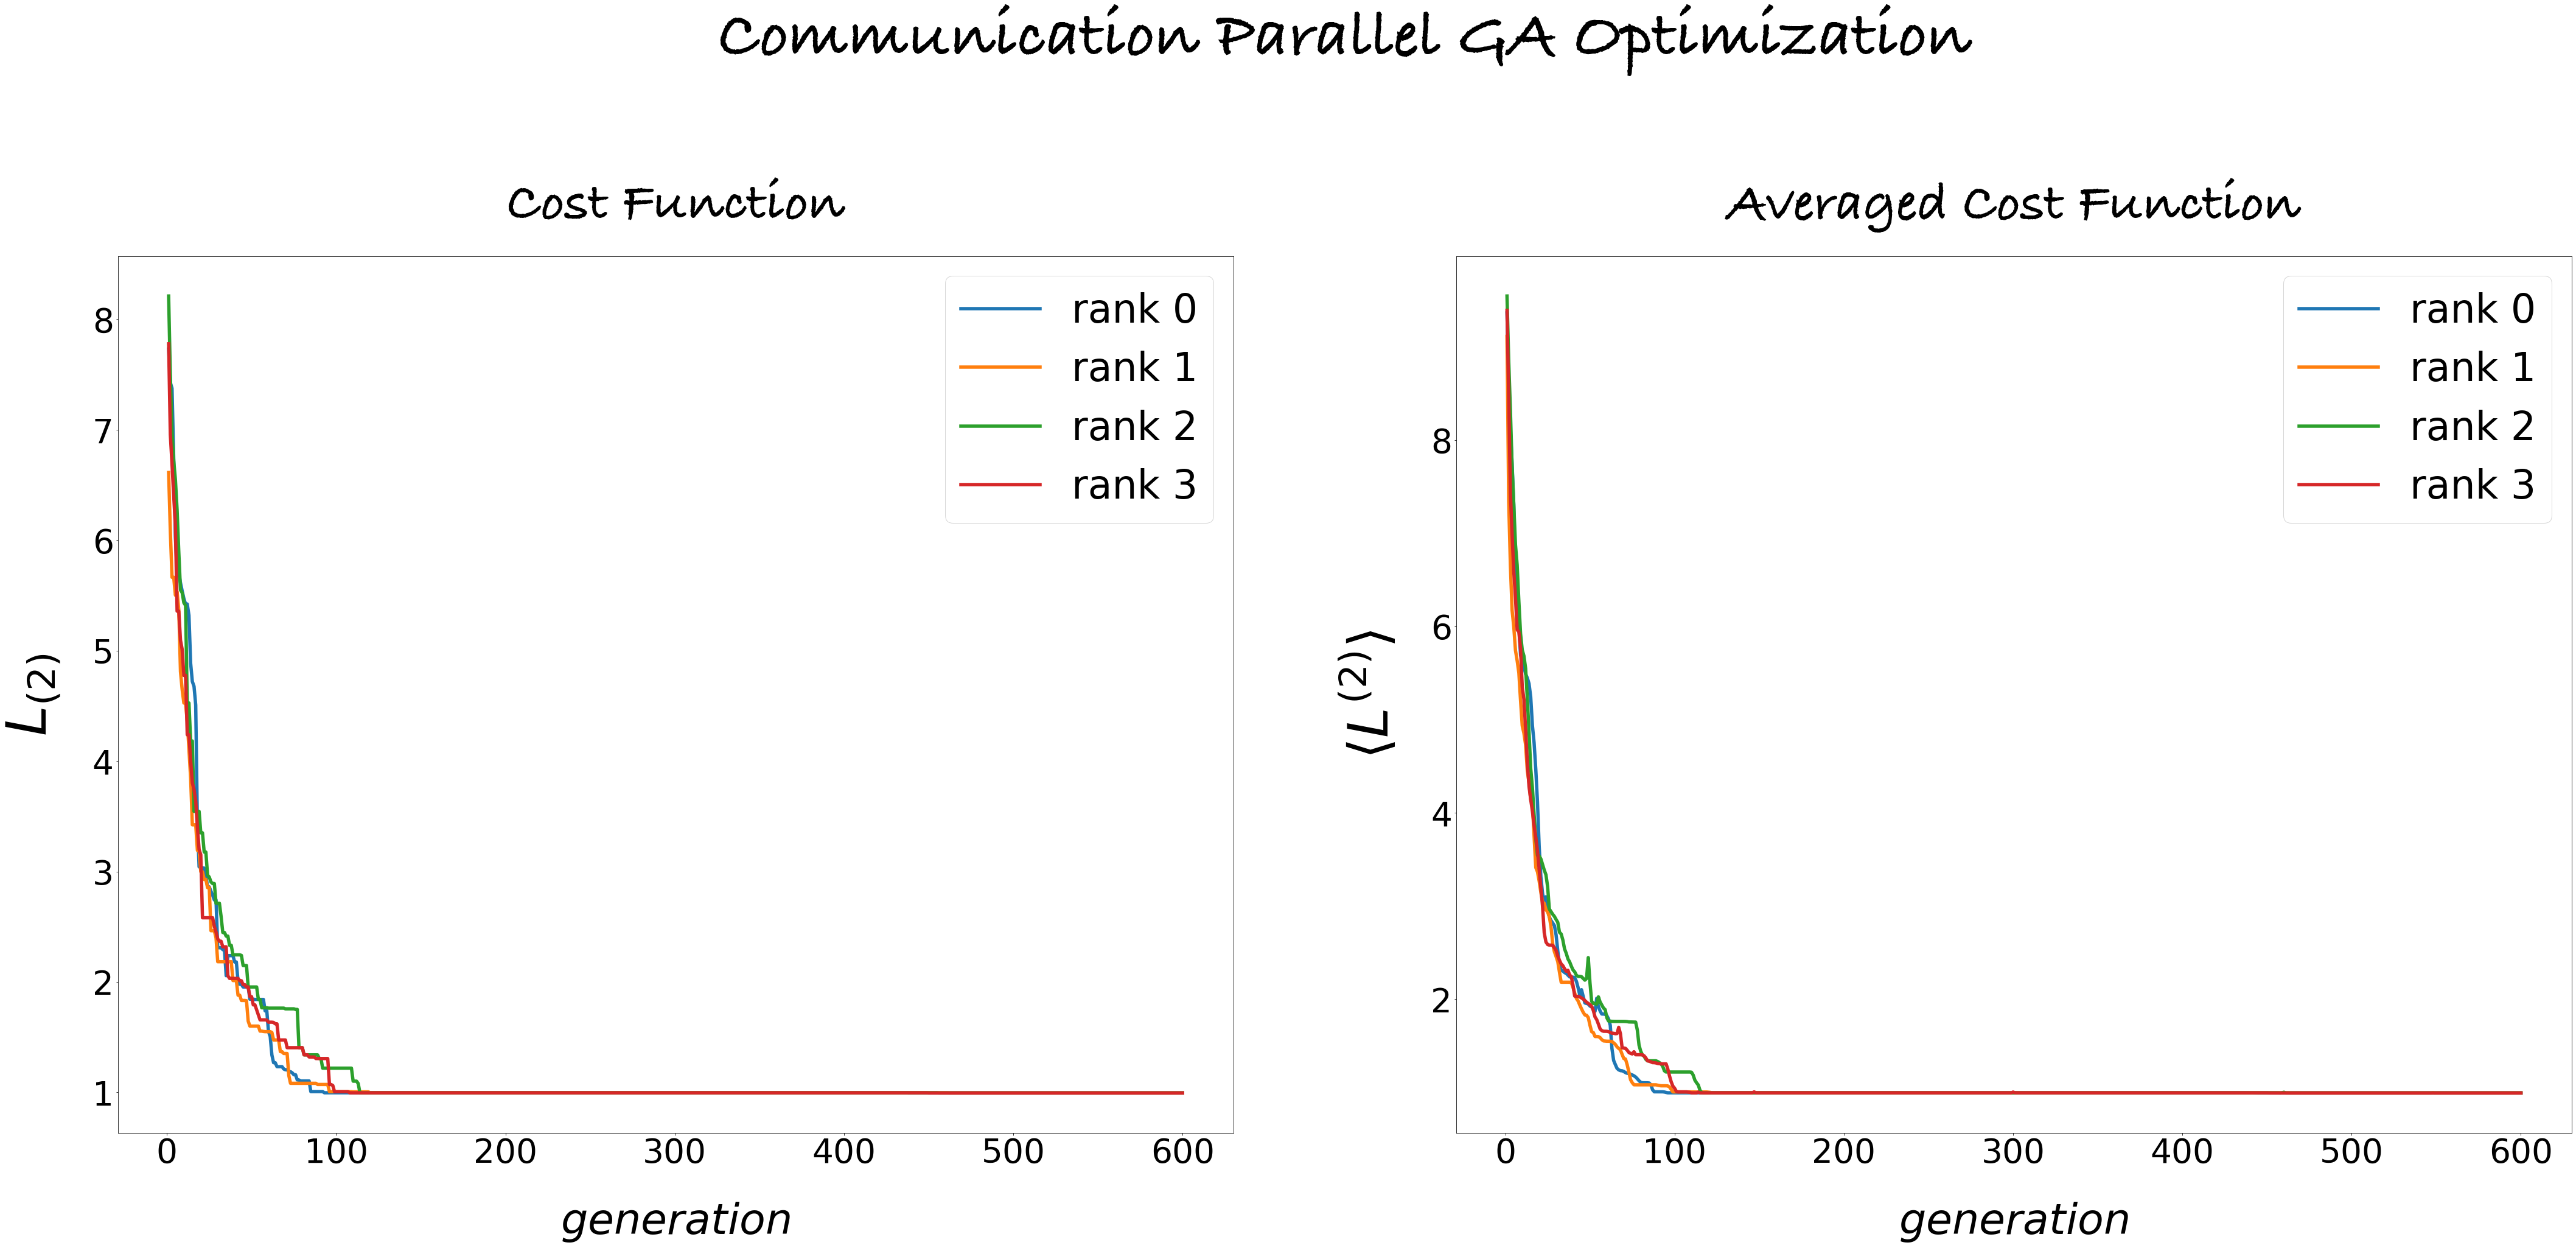

In [15]:
###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Communication Parallel GA Optimization', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$L_{(2)}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation[1:], L_rank0, linewidth=5.5, label='rank 0')
plt.plot(generation[1:], L_rank1, linewidth=5.5, label='rank 1')
plt.plot(generation[1:], L_rank2, linewidth=5.5, label='rank 2')
plt.plot(generation[1:], L_rank3, linewidth=5.5, label='rank 3')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('Averaged Cost Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$generation$', fontsize=70, labelpad=50)
plt.ylabel('$\\langle L^{(2)} \\rangle$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(generation[1:], L_ave_rank0, linewidth=5.5, label='rank 0')
plt.plot(generation[1:], L_ave_rank1, linewidth=5.5, label='rank 1')
plt.plot(generation[1:], L_ave_rank2, linewidth=5.5, label='rank 2')
plt.plot(generation[1:], L_ave_rank3, linewidth=5.5, label='rank 3')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()
print('\n\n')

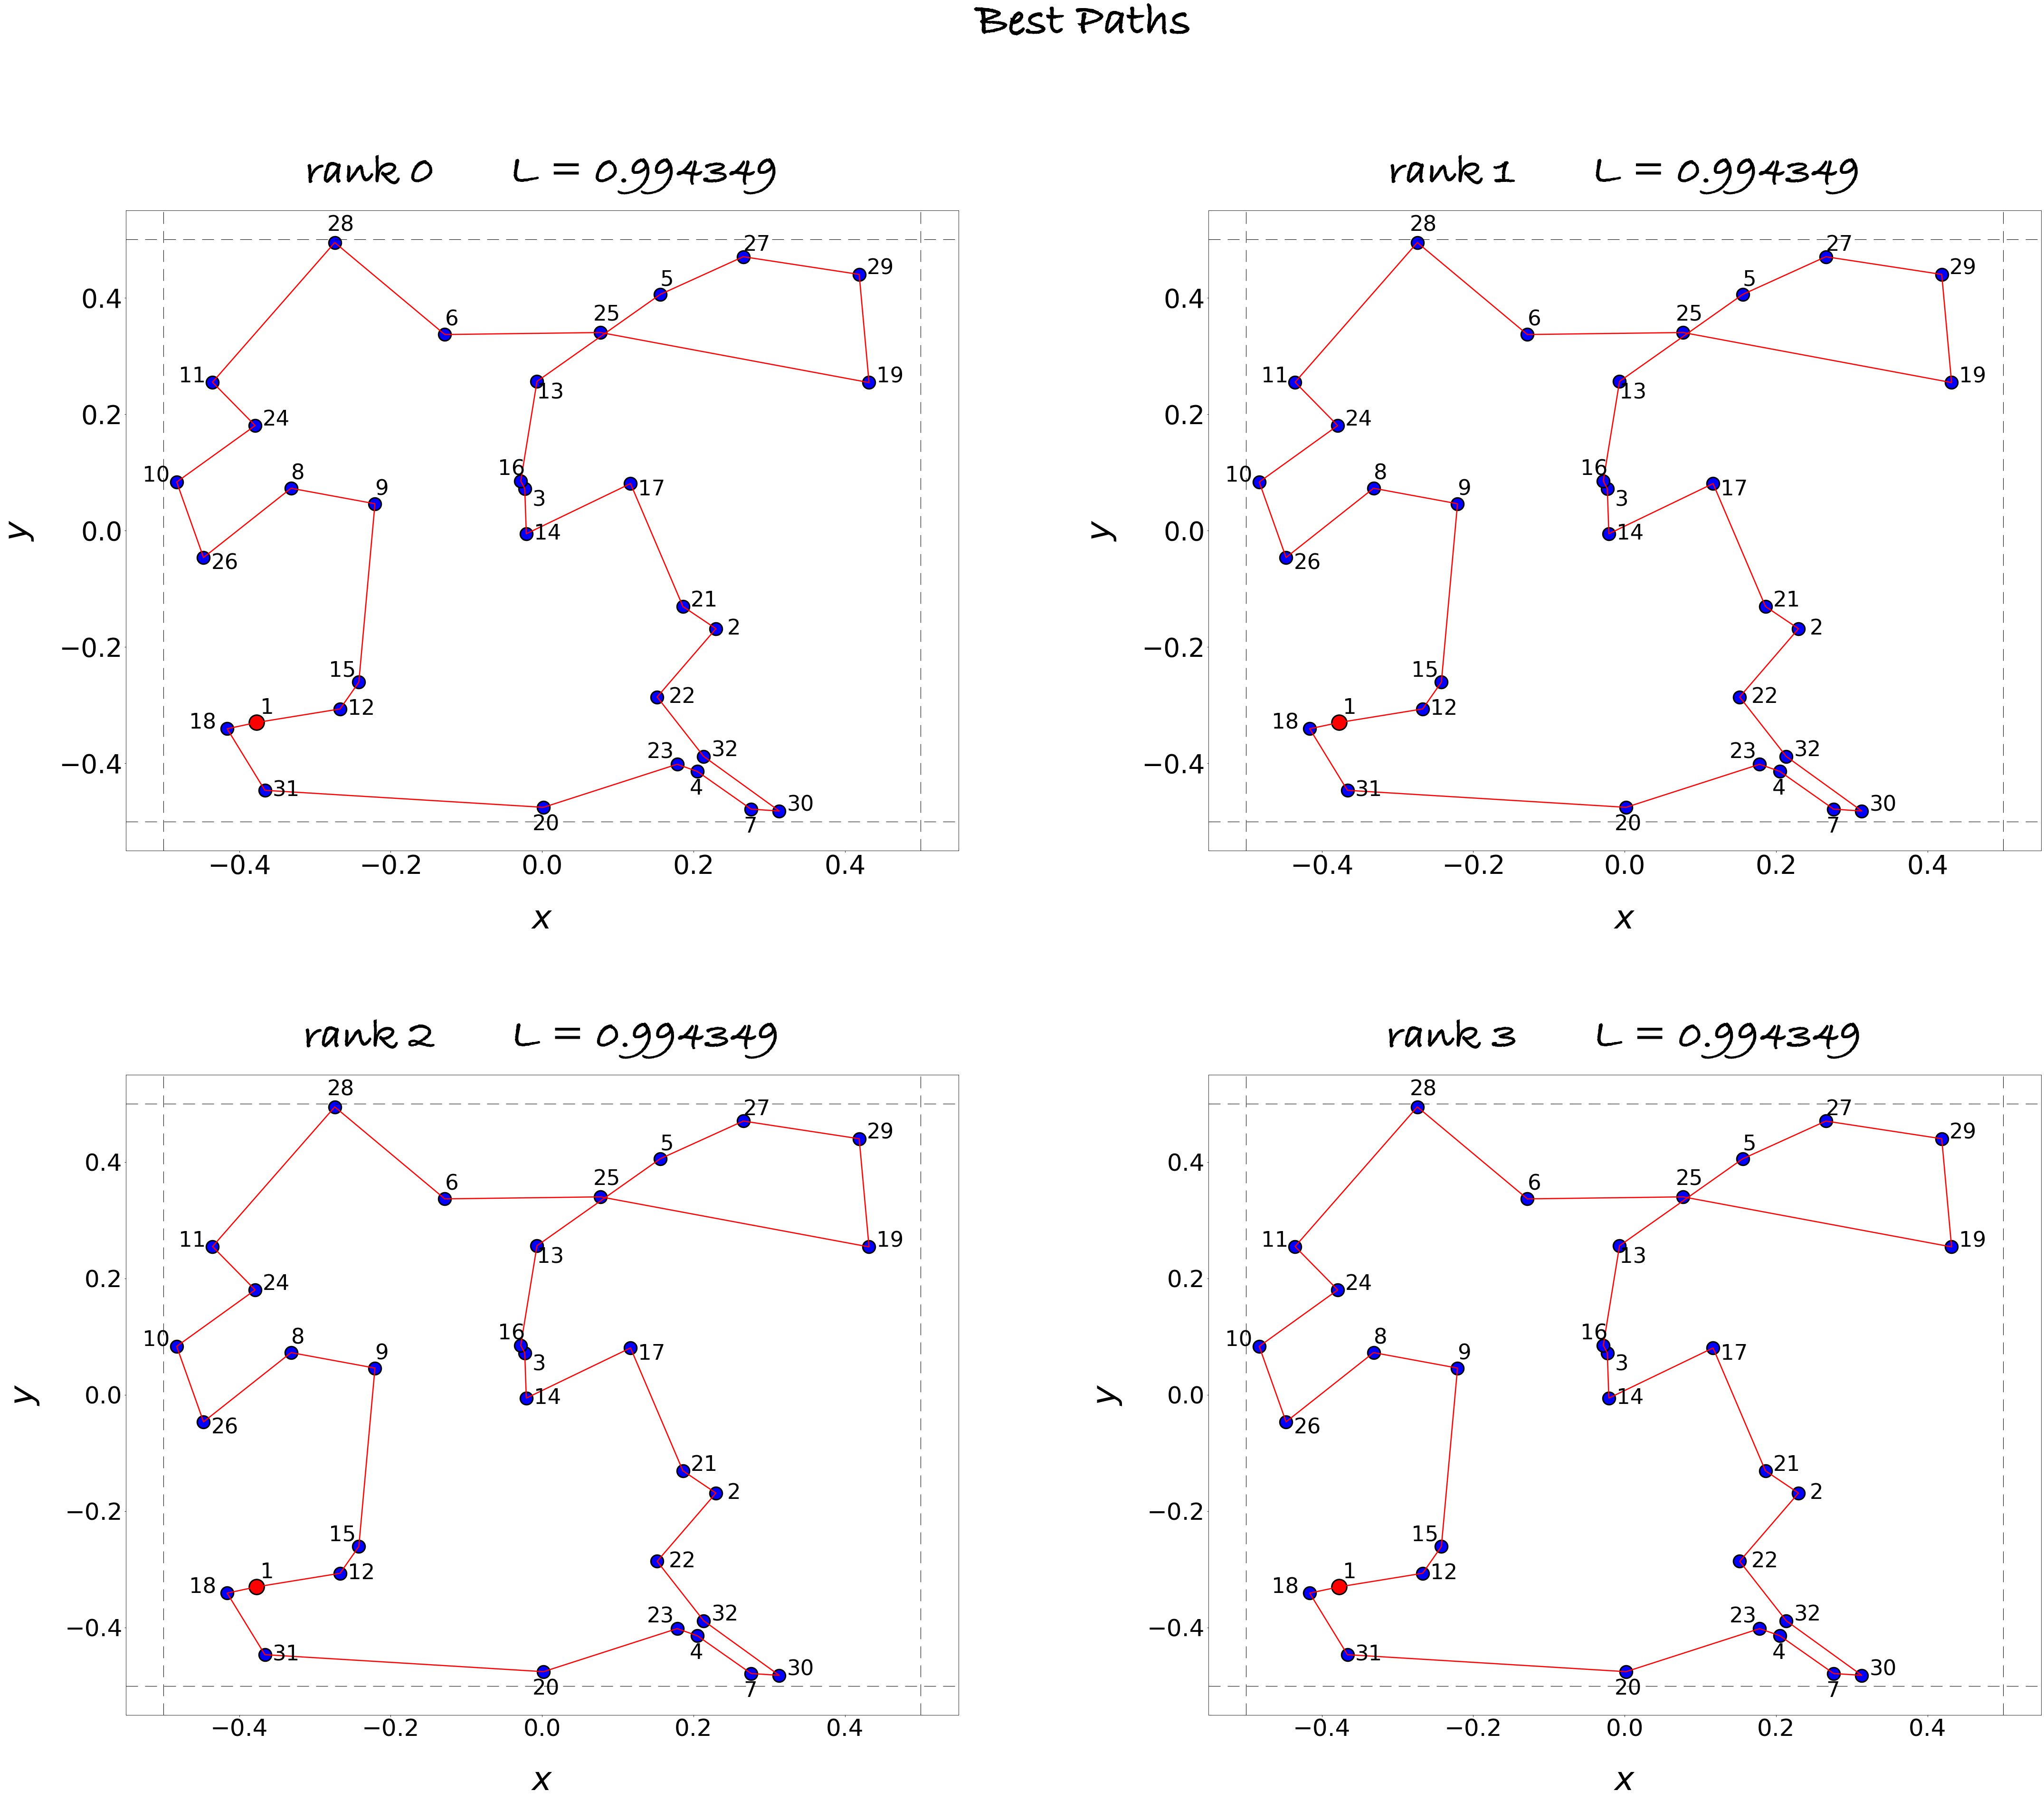

In [16]:
#Best Path
#Paths
p_rank0=[]
for i in range(N_city):
    p_rank0.append(paths_rank0[len(paths_rank0)-1][i])
p_rank1=[]
for i in range(N_city):
    p_rank1.append(paths_rank1[len(paths_rank1)-1][i])
p_rank2=[]
for i in range(N_city):
    p_rank2.append(paths_rank2[len(paths_rank2)-1][i])
p_rank3=[]
for i in range(N_city):
    p_rank3.append(paths_rank3[len(paths_rank3)-1][i])
    
#Draw
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Best Paths', y=1.01, fontname = 'Bradley Hand', fontsize=100)


plt.subplot(2, 2, 1)
plt.title('rank 0       L = ' + str(L_rank0[len(L_rank0)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank0, ys_rank0, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 2)
plt.title('rank 1       L = ' + str(L_rank1[len(L_rank1)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank1, ys_rank1, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 3)
plt.title('rank 2       L = ' + str(L_rank2[len(L_rank2)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank2, ys_rank2, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplot(2, 2, 4)
plt.title('rank 3       L = ' + str(L_rank3[len(L_rank3)-1]), y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$ x $', fontsize=70, labelpad=50)
plt.ylabel('$ y $', fontsize=70, labelpad=50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
#SQUARE
plt.axhline(y=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axhline(y=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=+0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
plt.axvline(x=-0.5, linewidth=1.0, linestyle='--', dashes=(25, 15), color = 'k')
#CITIES
plt.scatter(x_square[0], y_square[0], marker='o', color='red', 
            edgecolor='black', linewidths=3.0, s=10**3)
plt.scatter(x_square[1:], y_square[1:], marker='o', color='blue',
            edgecolor='black', linewidths=3.0, s=0.7*10**3)
plt.annotate(str(1), (x_square[0]+0.005, y_square[0]+0.015), fontsize=45)
plt.annotate(str(2), (x_square[1]+0.015, y_square[1]-0.01), fontsize=45)
plt.annotate(str(3), (x_square[2]+0.01, y_square[2]-0.03), fontsize=45)
plt.annotate(str(4), (x_square[3]-0.01, y_square[3]-0.04), fontsize=45)
plt.annotate(str(5), (x_square[4], y_square[4]+0.015), fontsize=45)
plt.annotate(str(6), (x_square[5], y_square[5]+0.015), fontsize=45)
plt.annotate(str(7), (x_square[6]-0.01, y_square[6]-0.04), fontsize=45)
plt.annotate(str(8), (x_square[7], y_square[7]+0.015), fontsize=45)
plt.annotate(str(9), (x_square[8], y_square[8]+0.015), fontsize=45)
plt.annotate(str(10), (x_square[9]-0.045, y_square[9]), fontsize=45)
plt.annotate(str(11), (x_square[10]-0.045, y_square[10]), fontsize=45)
plt.annotate(str(12), (x_square[11]+0.01, y_square[11]-0.01), fontsize=45)
plt.annotate(str(13), (x_square[12], y_square[12]-0.03), fontsize=45)
plt.annotate(str(14), (x_square[13]+0.01, y_square[13]-0.01), fontsize=45)
plt.annotate(str(15), (x_square[14]-0.04, y_square[14]+0.01), fontsize=45)
plt.annotate(str(16), (x_square[15]-0.03, y_square[15]+0.01), fontsize=45)
plt.annotate(str(17), (x_square[16]+0.01, y_square[16]-0.02), fontsize=45)
plt.annotate(str(18), (x_square[17]-0.05, y_square[17]), fontsize=45)
plt.annotate(str(19), (x_square[18]+0.01, y_square[18]), fontsize=45)
plt.annotate(str(20), (x_square[19]-0.015, y_square[19]-0.04), fontsize=45)
plt.annotate(str(21), (x_square[20]+0.01, y_square[20]), fontsize=45)
plt.annotate(str(22), (x_square[21]+0.015, y_square[21]-0.01), fontsize=45)
plt.annotate(str(23), (x_square[22]-0.04, y_square[22]+0.01), fontsize=45)
plt.annotate(str(24), (x_square[23]+0.01, y_square[23]), fontsize=45)
plt.annotate(str(25), (x_square[24]-0.01, y_square[24]+0.02), fontsize=45)
plt.annotate(str(26), (x_square[25]+0.01, y_square[25]-0.02), fontsize=45)
plt.annotate(str(27), (x_square[26], y_square[26]+0.01), fontsize=45)
plt.annotate(str(28), (x_square[27]-0.01, y_square[27]+0.02), fontsize=45)
plt.annotate(str(29), (x_square[28]+0.01, y_square[28]), fontsize=45)
plt.annotate(str(30), (x_square[29]+0.01, y_square[29]), fontsize=45)
plt.annotate(str(31), (x_square[30]+0.01, y_square[30]-0.01), fontsize=45)
plt.annotate(str(32), (x_square[31]+0.01, y_square[31]), fontsize=45)
#PATH
plt.plot(xs_rank3, ys_rank3, lw=2.5, color='red', linestyle='-', ms=10)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.35)
plt.show()

Processes reach the same minimum using the exchange protocol, each taking about $ 19 $ seconds.<br>
However, the best minimum is the one found by **Process 1** in the case of **No-Communication** between nodes, which is better than both the non-parallelised GA and the SA of the previous exercise.